**Building database with top-30 populated cities**

In [1]:
import csv
from math import sqrt

def left_binary_search(arr, x, l, r):
  if r - l <= 0:
    return l
  elif x >= arr[(l+r)//2][1]: 
    return left_binary_search(arr, x, l, (l+r)//2)
  return left_binary_search(arr, x, (l+r)//2 + 1, r)

sorted_population = list()
cities = {}
with open('cities.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    skip = True  # skip first row with the description
    for row in csv_reader:
        name = ""
        if skip:
          skip = False 
          continue
        if len(row[6]) < 2:
          if (row[0] != '366500'):
            cities[row[2]] = [float(row[17]), float(row[18])]
            name = row[2]
        else:
          cities[row[6]] = [float(row[17]), float(row[18])]
          name = row[6]
        if len(sorted_population) < 30 or int(row[-1]) > sorted_population[-1][1]:
          sorted_population.insert(left_binary_search(sorted_population, int(row[-1]), 0, len(sorted_population)), [name, int(row[-1])])
          if len(sorted_population) > 30:
            sorted_population.pop()
        
print(cities)
print(sorted_population)
top30 = {}
for index, city in enumerate(sorted_population):
  top30[city[0]] = cities[city[0]]
  sorted_population[index][1] = top30[city[0]]
print(top30)

{'Адыгейск': [44.8783715, 39.190172], 'Майкоп': [44.6098268, 40.1006527], 'Горно-Алтайск': [51.9582681, 85.9602957], 'Алейск': [52.4920914, 82.7794145], 'Барнаул': [53.3481145, 83.7798362], 'Белокуриха': [51.9960534, 84.9840343], 'Бийск': [52.5393683, 85.2138852], 'Горняк': [50.9979032, 81.4643059], 'Заринск': [53.7063495, 84.9314703], 'Змеиногорск': [51.1580235, 82.1872476], 'Камень-на-Оби': [53.7915454, 81.3545173], 'Новоалтайск': [53.4120811, 83.9311249], 'Рубцовск': [51.5013075, 81.2077729], 'Славгород': [52.9993053, 78.6459674], 'Яровое': [52.9251728, 78.5729898], 'Белогорск': [45.0571581, 34.5998775], 'Благовещенск': [55.0499592, 55.955309], 'Завитинск': [50.1064678, 129.4392897], 'Зея': [53.7339151, 127.2658079], 'Райчихинск': [49.7941882, 129.4112149], 'Свободный': [51.361264, 128.1218995], 'Сковородино': [53.9871004, 123.943729], 'Тында': [55.1546401, 124.7468634], 'Циолковский': [51.7624346, 128.121972], 'Шимановск': [52.0052856, 127.7006559], 'Архангельск': [64.5392985, 40.5

**Features for the SA algo**

In [2]:
import geopy.distance
import random
import math

def distance(cityA, cityB):
  return geopy.distance.vincenty(cities[cityA], cities[cityB]).km/1000

def paths_length(path):
  length = 0
  for i in range(1, len(path)):
    length += distance(path[i-1][0], path[i][0])
  return length

def random_traversal(vertices):
  random.shuffle(vertices)
  path = vertices
  return path

def P_star(new_loss, old_loss, T):
  ### energy function that is p*(x) in the task
  try:
    p_val = math.exp((old_loss - new_loss)/T)
  except OverflowError:
    p_val = float('inf')
  return p_val 

print(sorted_population)
travers = random_traversal(sorted_population)
print(travers)
print("random path is {0} km length".format(round(1000*paths_length(travers), 3)))

[['Москва', [55.7538789, 37.6203735]], ['Санкт-Петербург', [59.939125, 30.3158225]], ['Новосибирск', [55.0281016, 82.9210575]], ['Екатеринбург', [56.8386326, 60.6054887]], ['Нижний Новгород', [56.3242093, 44.0053948]], ['Казань', [55.7943877, 49.1115312]], ['Самара', [53.1951657, 50.1067691]], ['Омск', [54.9848136, 73.3674638]], ['Челябинск', [55.1603659, 61.4007858]], ['Ростов-на-Дону', [47.2224364, 39.7187866]], ['Уфа', [54.734853, 55.9578647]], ['Волгоград', [48.7072005, 44.5170207]], ['Пермь', [58.0103211, 56.2341778]], ['Красноярск', [56.009466, 92.8524162]], ['Воронеж', [51.6592378, 39.1968284]], ['Саратов', [51.530376, 45.9530257]], ['Краснодар', [45.040235, 38.9760801]], ['Тольятти', [53.5206438, 49.389461]], ['Барнаул', [53.3481145, 83.7798362]], ['Ижевск', [56.8527444, 53.2113961]], ['Ульяновск', [54.3080674, 48.3748717]], ['Владивосток', [43.1163807, 131.882348]], ['Ярославль', [57.6216145, 39.897878]], ['Иркутск', [52.2863513, 104.280655]], ['Тюмень', [57.1530824, 65.534311

**SA algo from the task for optimal route search**

In [0]:
T = 400
a = 0.95
iters_number = 500
curr_iter = 0
p_old = P_star(paths_length(travers), 0, T)
history = list()
history.append(paths_length(travers))
while curr_iter < iters_number:
  rand1 = random.randint(0, len(travers) - 2)
  rand2 = random.randint(rand1 + 1, len(travers) - 1)
  new_travers = list()
  for i in range(0, rand1):
    new_travers.append(travers[i])
  new_travers.append(travers[rand2])
  for i in range(rand1 + 1, rand2):
    new_travers.append(travers[i])
  new_travers.append(travers[rand1])
  for i in range(rand2 + 1, len(travers)):
    new_travers.append(travers[i])
  p = P_star(paths_length(new_travers), paths_length(travers), T)
  u = random.random()
  if u < p:
    travers = new_travers
  history.append(paths_length(travers))
  T *= a
  curr_iter += 1

**Drawing sub-optimal route that was found by SA**

In [0]:
!pip install transliterate

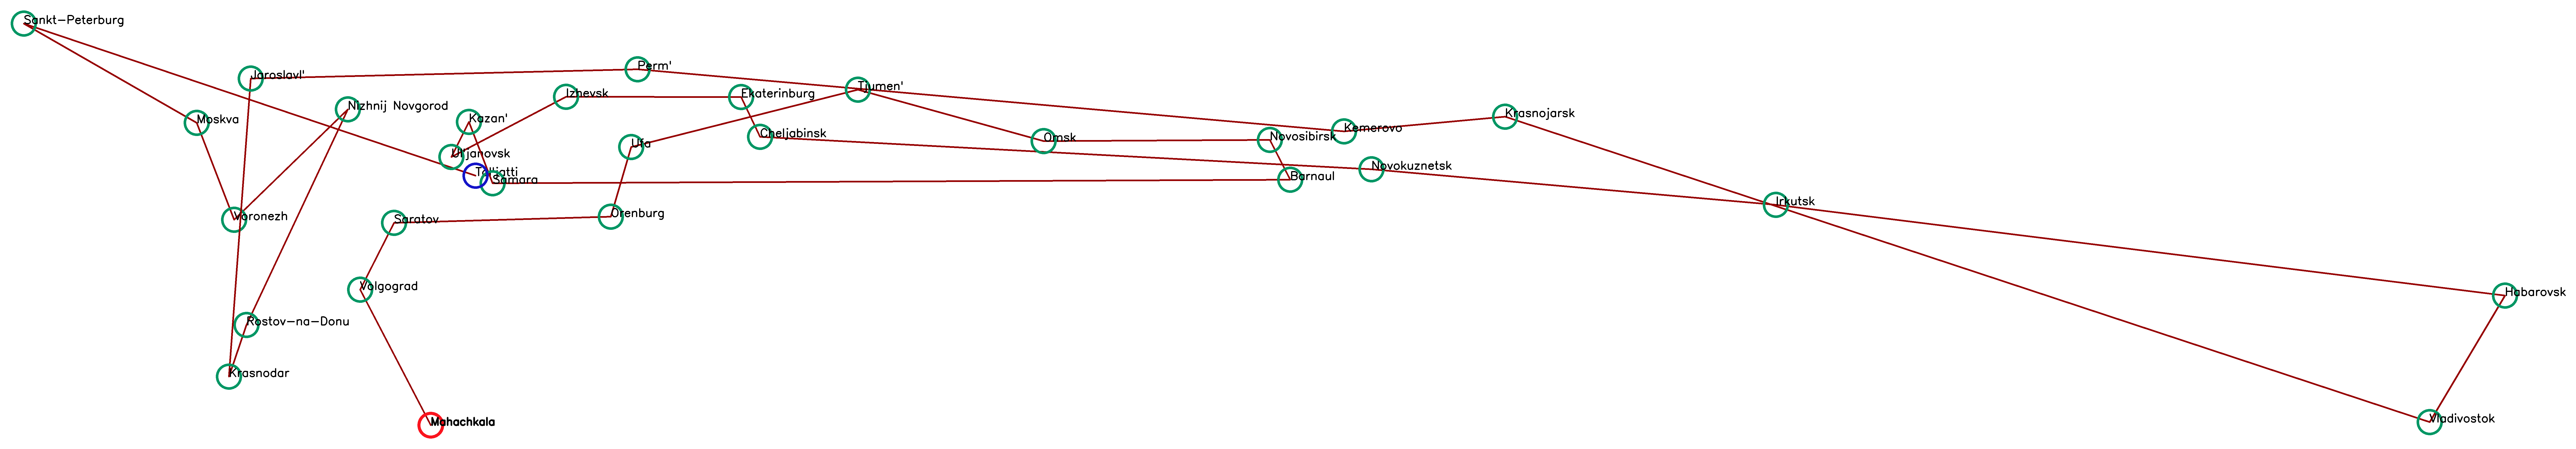

True

In [109]:
import cv2
import numpy as np
# from google.colab.patches import cv2_imshow  # uncomment this if you want to test on google colab
import transliterate

min_lon, min_lat = float('inf'), float('inf')
max_lon, max_lat = -1, -1
for i in travers:
  if i[1][0] < min_lat:
    min_lat = i[1][0]
  if i[1][0] > max_lat:
    max_lat = i[1][0]
  if i[1][1] < min_lon:
    min_lon = i[1][1]
  if i[1][1] > max_lon:
    max_lon = i[1][1]

x = int(100*(max_lat - min_lat))
y = int(100*(max_lon - min_lon))
pict = np.zeros([x+200,y+400,3])


cv2.line(pict, (0, 0), (10470, 1690), color=(255, 255, 255), thickness=30000)

for i, city in enumerate(travers[:-1]):
  a = (int(100*(city[1][1] - min_lon)) + 100, 100+ int(100*(city[1][0] - min_lat)))
  b = (100+ int(100*(travers[i + 1][1][1] - min_lon)), \
      100+int(100*(travers[i + 1][1][0] - min_lat)))
  
  cv2.line(pict, a, b, color=(0, 0, 150), thickness=5)

  cv2.circle(pict, a, 50, color=(100, 150, 0), thickness=10)

  cv2.putText(pict, transliterate.translit(city[0], reversed=True), \
    a, fontFace=cv2.FONT_HERSHEY_SIMPLEX, color=(0,0,0), fontScale=1.6, thickness=4, bottomLeftOrigin=True)

cv2.circle(pict, (100 + int(100*(travers[-1][1][1] - min_lon)), \
  100+int(100*(travers[-1][1][0] - min_lat))), 50, color=(30, 20, 250), thickness=12)
cv2.putText(pict, transliterate.translit(travers[-1][0], reversed=True), \
  (100+int(100*(travers[-1][1][1] - min_lon)), \
   100+int(100*(travers[-1][1][0] - min_lat))), fontFace=cv2.FONT_HERSHEY_SIMPLEX, \
    color=(0,0,0), fontScale=1.5, thickness=5, bottomLeftOrigin=True)

cv2.circle(pict, (100+int(100*(travers[0][1][1] - min_lon)), 100+int(100*(travers[0][1][0] - min_lat))), \
  50, color=(200, 20, 20), thickness=10)

pict = cv2.flip(pict, 0)
# cv2_imshow(pict)  # uncomment this line and line from the top if you test code on google colab
cv2.imwrite('suboptimal_route.png', pict)

**The history of the results of the search, the final route and its length is here:**

final temperature: 2.909796624575626e-09
final path length: 25539 km
The first city is Тольятти
next city number 2 is Санкт-Петербург, it is 2217.8 km away
next city number 3 is Москва, it is 798.4 km away
next city number 4 is Воронеж, it is 1075.0 km away
next city number 5 is Нижний Новгород, it is 402.9 km away
next city number 6 is Ростов-на-Дону, it is 494.9 km away
next city number 7 is Краснодар, it is 1303.7 km away
next city number 8 is Ярославль, it is 1157.2 km away
next city number 9 is Пермь, it is 1864.1 km away
next city number 10 is Кемерово, it is 2797.1 km away
next city number 11 is Красноярск, it is 2208.3 km away
next city number 12 is Владивосток, it is 3526.9 km away
next city number 13 is Хабаровск, it is 2951.3 km away
next city number 14 is Иркутск, it is 2289.8 km away
next city number 15 is Новокузнецк, it is 3335.3 km away
next city number 16 is Челябинск, it is 2803.3 km away
next city number 17 is Екатеринбург, it is 1711.5 km away
next city number 18 is

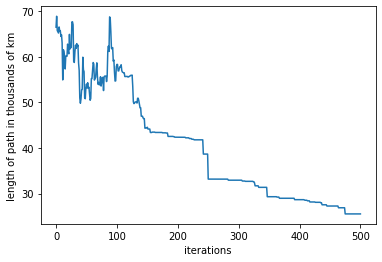

In [7]:
import matplotlib.pyplot as plt
plt.xlabel("iterations")
plt.ylabel("length of path in thousands of km")
plt.plot(history)
print("final temperature: {0}".format(T))
print("final path length: {0} km".format(int(1000*round(paths_length(travers), 3))))
print("The first city is {0}".format(travers[0][0]))
for index, city in enumerate(travers[1:]):
  print("next city number {0} is {1}, it is {2} km away".format(index+2, city[0], round(distance(travers[index - 1][0], city[0])*1000, 1))) 